In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [13]:
yields_data = pd.read_csv("../YieldModel/data/wheat_model_dataset_1900_2024.csv")
yields_data = yields_data[["year", "DEP", "yield"]]
yields_data.head()

,year,DEP,yield
0,1900,1,1.44401
1,1901,1,1.02637
2,1902,1,0.99449
3,1903,1,1.20303
4,1904,1,0.98300


In [ ]:
years = yields_data['year'].values.reshape(-1, 1)
yields = yields_data['yield']

In [16]:
model = LinearRegression(n_jobs=-1)
model.fit(years, yields)

LinearRegression(n_jobs=-1)

In [17]:
annual_trend = model.predict(years)

In [18]:
annual_trend

array([-0.08842447, -0.03418064,  0.02006318, ...,  6.5293224 ,
        6.58356623,  6.63781005])

In [41]:
trend = pd.DataFrame({"year": years.flatten(), "trend": annual_trend})

In [42]:
trend = trend.drop_duplicates()

In [43]:
trend

,year,trend
0,1900,-0.088424
1,1901,-0.034181
2,1902,0.020063
3,1903,0.074307
4,1904,0.128551
...,...,...
10283,2020,6.420835
10284,2021,6.475079
10285,2022,6.529322
10286,2023,6.583566


In [54]:
temp = yields_data[yields_data["DEP"] == 79][["year", "yield"]]
df = pd.merge(trend, temp, on="year", how="inner")
df = df.sort_values(by="year")
df = df.set_index("year")

<Axes: xlabel='year'>

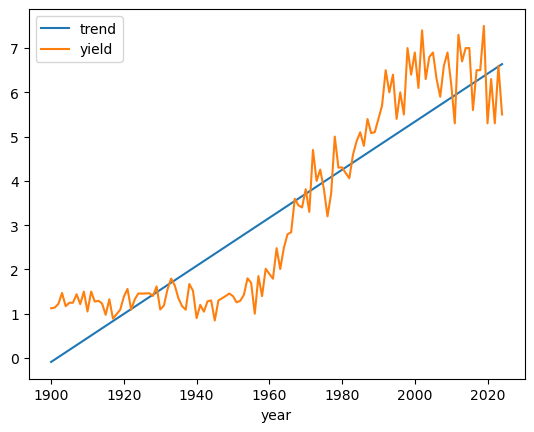

In [55]:
df.plot()